In [1]:
#CNN
#AlexNet
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [37]:
#import the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [36]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [43]:
#Transform to tensor dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test))
#each element contains two subelement, including x (32, 32, 3) and y (1 value)

In [44]:
#preprocess the data
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

In [45]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


In [46]:
#Data transformation
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size = 45000)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=10000)
          .batch(batch_size=32,drop_remainder=True)
         )



In [48]:
AlexNet = keras.models.Sequential([
  keras.layers.Conv2D(96, 11, activation="relu", strides=(4,4), input_shape=[64, 64, 3]),
  keras.layers.MaxPooling2D(2),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2D(256, 5, activation="relu", padding="same"),
  keras.layers.MaxPooling2D(3),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(256, 1, activation="relu", padding="same"),
  keras.layers.Conv2D(256, 1, activation="relu", padding="same"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(1024,activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10,activation='softmax'),
]
)

In [49]:
AlexNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 96)         0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 96)         384       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 256)         614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                      

In [50]:
AlexNet.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']    
)

In [51]:
history=AlexNet.fit(
    train_ds,
    epochs=30,
    validation_data = test_ds,
    validation_freq=1
)


Epoch 1/30
1562/1562 [==============================] - 17s 8ms/step - loss: 2.2131 - accuracy: 0.1676 - val_loss: 1.9978 - val_accuracy: 0.2927
Epoch 2/30
1562/1562 [==============================] - 16s 8ms/step - loss: 1.9657 - accuracy: 0.2629 - val_loss: 1.7677 - val_accuracy: 0.3625
Epoch 3/30
1562/1562 [==============================] - 16s 8ms/step - loss: 1.7877 - accuracy: 0.3326 - val_loss: 1.6109 - val_accuracy: 0.4198
Epoch 4/30
1562/1562 [==============================] - 15s 8ms/step - loss: 1.6389 - accuracy: 0.3951 - val_loss: 1.4658 - val_accuracy: 0.4759
Epoch 5/30
1562/1562 [==============================] - 16s 8ms/step - loss: 1.5092 - accuracy: 0.4469 - val_loss: 1.3588 - val_accuracy: 0.5100
Epoch 6/30
1562/1562 [==============================] - 15s 8ms/step - loss: 1.3960 - accuracy: 0.4918 - val_loss: 1.2757 - val_accuracy: 0.5391
Epoch 7/30
1562/1562 [==============================] - 16s 8ms/step - loss: 1.3101 - accuracy: 0.5248 - val_loss: 1.2086 - val_ac

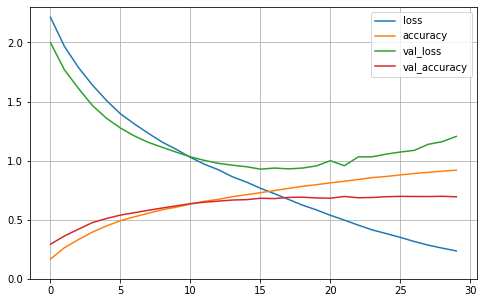

In [56]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.3) # set the vertical range to [0-1]
plt.show()